In [ ]:
import tensorflow as tf
import numpy as np

IMG_DIM1 = 100
IMG_DIM2 = 120
SLICE_COUNT = 60

n_classes = 2
batch_size = 10

x = tf.placeholder('float')
y = tf.placeholder('float')

keep_rate = 0.8


In [ ]:
def conv3d(x, W):
    return tf.nn.conv3d(x, W, strides=[1,1,1,1,1], padding='SAME')

def maxpool3d(x):
    #                        size of window         movement of window as you slide about
    return tf.nn.max_pool3d(x, ksize=[1,2,2,2,1], strides=[1,2,2,2,1], padding='SAME')

# This is the network graph
def convolutional_neural_network(x):
    # Initialize weights with a small positive random noise (to avoid "dead" neurons due to ReLU ignoring negative)
    #                # 5 x 5 x 5 patches, 1 channel, 32 features to compute.
    weights = {'W_conv1':tf.Variable(tf.truncated_normal([3,3,3,1,32],stddev=0.1)),
               #       5 x 5 x 5 patches, 32 channels, 64 features to compute.
               'W_conv2':tf.Variable(tf.truncated_normal([3,3,3,32,64],stddev=0.1)),
               #                                  64 features
               'W_fc':tf.Variable(tf.truncated_normal([54080,1024],stddev=0.1)),
               'out':tf.Variable(tf.truncated_normal([1024, n_classes],stddev=0.1))}

    # Sentdex used tf.random_normal to initialize biases, but MNIST TF tutorial just defines them with tf.constant
    biases = {'b_conv1':tf.Variable(tf.random_normal([32])),
               'b_conv2':tf.Variable(tf.random_normal([64])),
               'b_fc':tf.Variable(tf.random_normal([1024])),
               'out':tf.Variable(tf.random_normal([n_classes]))}

    #                            image X   image Y       image Z
    x = tf.reshape(x, shape=[-1, IMG_DIM1, IMG_DIM2, SLICE_COUNT, 1])

    conv1 = tf.nn.relu(conv3d(x, weights['W_conv1']) + biases['b_conv1'])
    conv1 = maxpool3d(conv1)


    conv2 = tf.nn.relu(conv3d(conv1, weights['W_conv2']) + biases['b_conv2'])
    conv2 = maxpool3d(conv2)

    fc = tf.reshape(conv2,[-1, 54080])
    fc = tf.nn.relu(tf.matmul(fc, weights['W_fc'])+biases['b_fc'])
    fc = tf.nn.dropout(fc, keep_rate)

    output = tf.matmul(fc, weights['out'])+biases['out']

    return output

In [ ]:
'''
This needs to be updated to reflect the way I am saving data arrays as individual files.

Also, what are my data dims? Also 50x50x20?

much_data = np.load('muchdata-50-50-20.npy')
# If you are working with the basic sample data, use maybe 2 instead of 100 here... you don't have enough data to really do this
train_data = much_data[:-100]
validation_data = much_data[-100:]
'''



def train_neural_network(x):
    prediction = convolutional_neural_network(x)
    cost = tf.reduce_mean( tf.nn.softmax_cross_entropy_with_logits(prediction,y) )
    optimizer = tf.train.AdamOptimizer(learning_rate=1e-3).minimize(cost)
    
    hm_epochs = 10
    with tf.Session() as sess:
        sess.run(tf.initialize_all_variables())
        
        successful_runs = 0
        total_runs = 0
        
        for epoch in range(hm_epochs):
            epoch_loss = 0
            for data in train_data:
                total_runs += 1
                try:
                    X = data[0]
                    Y = data[1]
                    _, c = sess.run([optimizer, cost], feed_dict={x: X, y: Y})
                    epoch_loss += c
                    successful_runs += 1
                except Exception as e:
                    # I am passing for the sake of notebook space, but we are getting 1 shaping issue from one 
                    # input tensor. Not sure why, will have to look into it. Guessing it's
                    # one of the depths that doesn't come to 20.
                    pass
                    #print(str(e))
            
            print('Epoch', epoch+1, 'completed out of',hm_epochs,'loss:',epoch_loss)

            correct = tf.equal(tf.argmax(prediction, 1), tf.argmax(y, 1))
            accuracy = tf.reduce_mean(tf.cast(correct, 'float'))

            print('Accuracy:',accuracy.eval({x:[i[0] for i in validation_data], y:[i[1] for i in validation_data]}))
            
        print('Done. Finishing accuracy:')
        print('Accuracy:',accuracy.eval({x:[i[0] for i in validation_data], y:[i[1] for i in validation_data]}))
        
        print('fitment percent:',successful_runs/total_runs)

# Run this locally:
# train_neural_network(x)

In [1]:
import numpy as np
array_fold = '3Darrays_stage1'
aname = '0a0c32c9e08cc2ea76a71649de56be6d.npy'
test_data = np.load(array_fold+'/'+aname)

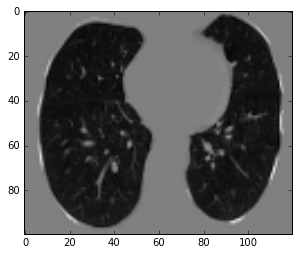

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(test_data[20,:,:],cmap='gray')
# make images 50X50x50

In [31]:
import tensorflow as tf
IMG_DIM1 = 100
IMG_DIM2 = 120
SLICE_COUNT = 60
x = test_data
x = tf.reshape(x, shape=[-1,IMG_DIM1, IMG_DIM2, SLICE_COUNT,1])

In [32]:
x

<tf.Tensor 'Reshape_2:0' shape=(1, 100, 120, 60, 1) dtype=int16>